### TIME SERIES


#### Автор: Приходько Игорь Анатольевич

##### г.Санкт-Петербург


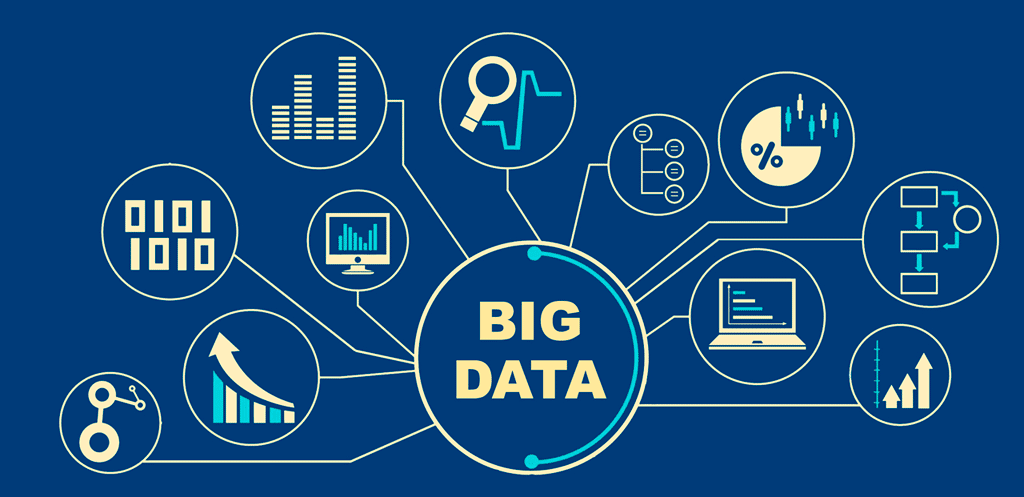

# 12 lesson

# Lesson topic: Time series. Типы данных и инструменты, относящиеся к дате и времени

# Временные ряды

Временные ряды  – важная разновидность структурированных данных.

Они встречаются во многих областях, в том числе в финансах, экономике, экологии, нейронауках и  физике. 
Любые результаты наблюдений или измерений в разные моменты времени образуют временной ряд. Для многих временных 
рядов характерна 

фиксированная частота, т.  е. интервалы между соседними точками одинаковы – 

измерения производятся, например, один раз в 15 секунд, 5 минут или в месяц. 
Но временные ряды могут быть и нерегулярными, когда интервалы времени между соседними точками различаются. 
Как разметить временной ряд и обращаться к нему, зависит от приложения. 

Существуют следующие варианты:

##### ● Временные метки

Конкретные моменты времени.

##### ● Фиксированные периоды

Например, январь 2007 или весь 2010 год.

##### ● Временные интервалы

Обозначаются метками начала и конца. Периоды можно считать частными случаями интервалов.

##### ● Время эксперимента или истекшее время

Каждая временная метка измеряет время, прошедшее с  некоторого начального момента. 
Например, результаты ежесекундного измерения диаметра печенья с момента помещения теста в духовку.

В этом курсе нас в основном будут интересовать временные ряды трех первых видов, 
хотя многие методы применимы и к экспериментальным временным рядам, 
когда индекс может содержать целые или вещественные значения, 
обозначающие время, прошедшее с  начала эксперимента. 

##### Простейший вид временных рядов – ряды, индексированные временной меткой.

В библиотеке pandas имеется стандартный набор инструментов и алгоритмов для работы с  временными рядами. 
Он  позволяет эффективно работать с большими рядами, легко строить продольные и поперечные срезы, 
агрегировать и производить передискретизацию регулярных и нерегулярных временных рядов. 
Как нетрудно догадаться, многие их этих инструментов особенно 
полезны в финансовых и эконометрических приложениях, но никто не мешает применять их, 
например, к анализу журналов сервера.
Как и в других главах, прежде всего импортируем NumPy и pandas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Типы данных и инструменты, относящиеся к дате и времени

В стандартной библиотеке Python имеются типы данных для представления 

даты и времени, а также средства, относящиеся к календарю. Начинать изучение надо с модулей 

#### datetime, 

#### time и 

#### calendar. 

Особенно широко используется тип datetime.datetime, или просто datetime

In [ ]:
from datetime import datetime

In [ ]:
now = datetime.now()

In [ ]:
now

In [ ]:
now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond

##### В объекте типа datetime хранятся дата и время с точностью до микросекунды. 

##### Класс datetime.timedelta, или просто timedelta, представляет интервал времени между двумя объектами datetime:

In [ ]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [ ]:
delta

In [ ]:
delta.days, delta.seconds

In [ ]:
delta.microseconds

Можно прибавить (или вычесть) объект типа timedelta или его произведение 

на целое число к объекту datetime и получить в результате новый объект того же 

типа, представляющий соответственно сдвинутый момент времени:

In [ ]:
from datetime import timedelta

In [ ]:
start = datetime(2011, 1, 7)

In [ ]:
start + timedelta(12)

In [ ]:
start - 2 * timedelta(12)

#### Типы в модуле datetime

##### Тип   Описание

##### • date - Хранит дату (год, месяц, день) по григорианскому календарю

##### • time - Хранит время суток (часы, минуты, секунды и микросекунды)

##### • datetime - Хранит дату и время

##### • timedelta - Представляет разность между двумя значениями типа datetime (дни, секунды и микросекунды)

##### • tzinfo - Базовый тип для хранения информации о часовых поясах

### Преобразование между строкой и datetime

Объекты типа datetime и входящего в pandas типа Timestamp, с которым мы вскоре 

познакомимся, можно представить в  виде отформатированной строки с  помощью метода str или strftime, 

которому передается спецификация формата

In [ ]:
stamp = datetime(2011, 1, 3)

In [ ]:
str(stamp)

In [ ]:
stamp.strftime("%Y-%m-%d")

### Спецификации формата даты в классе datetime (совместимо со стандартом ISO C89)

##### Спецификатор     Описание

##### %Y Год с четырьмя цифрами

##### %y Год с двумя цифрами

##### %m Номер месяца с двумя цифрами [01, 12]

##### %d Номер дня с двумя цифрами [01, 31]

##### %H Час (в 24-часовом формате) [00, 23]

##### %I Час (в 12-часовом формате) [01, 12]

##### %M Минута с двумя цифрами [01, 59]

##### %S Секунда [00, 61] (секунды 60 и 61 високосные)

##### %f Микросекунды в виде целого, дополненного слева нулями (от 000000 до 999999)

##### %j День года в виде целого, дополненного слева нулями (от 001 до 366)

##### %w День недели в виде целого числа [0 (воскресенье), 6]

##### %u День недели в виде целого числа, начинающегося с 1, где 1 соответствует понедельнику

##### %U Номер недели в году [00, 53]. Первым днем недели считается воскресенье, а дни, предшествующие первому воскресенью, 

относятся к «неделе 0»

##### %W Номер недели в году [00, 53]. Первым днем недели считается понедельник, а дни, предшествующие первому понедельнику, 

относятся к «неделе 0»

##### %z Часовой пояс UTC в виде +HHMM или –HHMM; пустая строка, если часовой пояс не учитывается

##### %F Сокращение для %Y-%m-%d, например 2012-4-18

##### %D Сокращение для %m/%d/%y, например 04/18/12

Многие из этих кодов используются для преобразования строк в даты методом 

#### datetime.strptime 

(но, например, %F так использовать нельзя):

In [ ]:
value = "2011-01-03"

In [ ]:
datetime.strptime(value, "%Y-%m-%d")

In [ ]:
datestrs = ["7/6/2011", "8/6/2011"]

In [ ]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

Метод datetime.strptime хорошо работает, когда формат даты известен.

Библиотека pandas, вообще говоря, ориентирована на работу с массивами 

дат, используемых как в качестве осевого индекса, так и столбца в DataFrame. 

#### Метод to_datetime разбирает различные представления даты. Стандартные форматы, например ISO8601, разбираются очень быстро.

In [ ]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [ ]:
pd.to_datetime(datestrs)

Кроме того, этот метод умеет обрабатывать значения, которые следует считать отсутствующими (None, пустая строка и т. д.)

In [ ]:
idx = pd.to_datetime(datestrs + [None])

In [ ]:
idx

In [ ]:
idx[2]

In [ ]:
# Функция Pandas dataframe.isna () используется для обнаружения пропущенных значений. Он возвращает логический объект того же размера, 
# указывающий, являются ли значения пропущенными (True), или нет (False)
pd.isna(idx)

NaT (Not a Time – не время) – применяемое в pandas значение для индикации 
отсутствующей временной метки.

### Домашнее задание

### Задача 1: Создайте 2 объекта типа datetime.datetime 

### и потом получите из них 1 объект типа datetime.timedelta

### Задача 2: Представьте объект типа datetime.datetime 

### в виде отформатированной строки с помощью метода datetime.str или datetime.strptime

### в формате "%m/%d/%Y"

### Задача 3: Преобразуйте список строк с датами в даты, используя метод to_datetime

["2011-1-01 09:35:00", "2024-01-5 09:35:00"]

# 13 lesson

# Lesson topic: Time series. Основы работы с временными рядами

Самый простой вид временного ряда в pandas – объект Series, 

индексированный временными метками, которые часто представляются внешними по отношению 

к pandas Python-строками или объектами datetime:

In [ ]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [ ]:
ts = pd.Series(np.random.standard_normal(6), index=dates)

In [ ]:
ts

In [ ]:
ts.index

Как и для других объектов Series, арифметические операции над временными рядами 
с различными индексами автоматически приводят к выравниванию дат:

In [ ]:
ts + ts[::2]

Напомним, что конструкция ts[::2] выбирает каждый второй элемент ts.

##### В pandas временные метки хранятся в типе данных NumPy datetime64 с наносекундным разрешением:

In [ ]:
ts.index.dtype

Скалярные значения в  индексе DatetimeIndex  – это объекты pandas типа 
Timestamp:

In [ ]:
stamp = ts.index[0]

In [ ]:
stamp

Объект типа pandas.Timestamp можно использовать всюду, где допустим объект

datetime. Обратное, однако, неверно, потому что в pandas.Timestamp можно хранить 

данные с  наносекундной точностью, а  в datetime – только с  микросекундной. 

Кроме того, в pandas.Timestamp можно хранить информацию о частоте (если имеется), 

и он умеет преобразовывать часовые пояса и производить другие манипуляции. 

### Индексирование, выборка, подмножества

TimeSeries – подкласс Series и потому ведет себя точно так же по отношению 

к индексированию и выборке данных по метке:

In [ ]:
stamp = ts.index[2]

In [ ]:
ts[stamp]

В качестве дополнительного удобства можно передать строку, допускающую интерпретацию в виде даты:

In [ ]:
ts["2011-01-10"]

In [ ]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))

In [ ]:
# Чтобы увидеть все значения в ячейке Jupyter Notebook, 
# если их много, можно изменить настройку отображения. 
# Для этого нужно добавить вверху документа следующий код (в отдельной ячейке):
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
longer_ts

In [ ]:
longer_ts["2001"]

Здесь строка '2001' интерпретируется как год, и выбирается такой период
времени. Это будет работать и тогда, когда указан месяц:

In [ ]:
longer_ts["2001-05"]

Выборка срезов с помощью объектов datetime тоже работает:

In [ ]:
ts[datetime(2011, 1, 7):]

In [ ]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

Поскольку временные ряды обычно упорядочены хронологически, при формировании срезов можно указывать временные метки, 
отсутствующие в самом ряду, чтобы выполнить запрос по диапазону:

In [ ]:
ts

In [ ]:
ts["2011-01-06":"2011-01-11"]

Как и раньше, можно задать дату в виде строки, объекта datetime или Timestamp. 
Напомню, что такое формирование среза порождает представление исходного 
временного ряда, как и для массивов NumPy. Это означает, что никакие данные не копируются, 
а модификация среза отражается на исходных данных.
Существует эквивалентный метод экземпляра truncate, который возвращает 
срез Series между двумя датами:

In [ ]:
ts.truncate(after="2011-01-09") # truncate - усекать, обрезать

Все вышеперечисленное справедливо и для объекта DataFrame, индексированного своими строками

In [ ]:
# Параметр freq="W-WED" в pandas указывает, что точка разбиения для недельной периодичности будет в среду.
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
dates

In [ ]:
# np.random.standard_normal() - даёт элементы из стандартного нормального распределения (среднее значение = 0, стандартное отклонение = 1).
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas", "New York", "Ohio"])

In [ ]:
long_df.loc["2001-05"]

### Временные ряды с неуникальными индексами

В некоторых приложениях бывает, что несколько результатов измерений имеют одну и ту же временную метку, например:

In [ ]:
 dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                           "2000-01-02", "2000-01-03"])

In [ ]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [ ]:
dup_ts

##### Узнать о том, что индекс не уникален, можно, опросив его свойство is_unique:

In [ ]:
dup_ts.index.is_unique

При доступе к такому временному ряду по индексу будет возвращено либо 
скалярное значение, либо срез – в зависимости от того, является временная 
метка уникальной или нет:

In [ ]:
dup_ts["2000-01-03"] # метка уникальна

In [ ]:
dup_ts["2000-01-02"] # метка повторяется

Пусть требуется агрегировать данные с неуникальными временными метками. 

Одно из возможных решений – воспользоваться методом groupby с 

параметром level=0 (один-единственный уровень):

In [ ]:
grouped = dup_ts.groupby(level=0)

In [ ]:
grouped.mean()

In [ ]:
grouped.count()

### Домашнее задание

### Задача 1: Создайте временной ряд в Pandas в виде Series из следующих данных (dates и data):

dates = [datetime(2019, 5, 3), datetime(2019, 5, 7),
         
         datetime(2019, 5, 9), datetime(2019, 5, 10),
         
         datetime(2019, 5, 12), datetime(2019, 1, 15),
         
         datetime(2019, 5, 17), datetime(2019, 1, 21)]

data = [2, 4, 1, 5, 2, 6, 3, 2]

### Задача 2: Получите выборку данных из временного ряда, полученного в Задаче 1, в диапазоне дат:

"2019-05-09":"2019-05-15"

### Задача 3: Проверьте, уникален ли индекс полученного в Задаче 1 временного ряда.

# 14 lesson

# Lesson topic: Time series. Диапазоны дат, частоты и сдвиг

Вообще говоря, временные ряды pandas не предполагаются регулярными, т. е. 

частота в них не фиксирована. Для многих приложений это вполне приемлемо. 

Но иногда желательно работать с постоянной частотой, например день, месяц, 

15 минут, даже если для этого приходится вставлять в ряд отсутствующие значения. 

По счастью, pandas поддерживает полный набор частот и средства для 

передискретизации, выведения частот и генерации диапазонов дат с фиксированной частотой. 

Например, временной ряд из нашего примера можно преобразовать в ряд с частотой один день 

с помощью метода resample:

In [ ]:
ts

In [ ]:
resampler = ts.resample("D")

In [ ]:
resampler

Строка 'D' интерпретируется как частота раз в сутки (daily).
Преобразование частоты, или передискретизация,  – настолько обширная 
тема, что мы посвятим ей отдельный раздел ниже. А сейчас я покажу, как 
работать с базовой частотой и кратными ей.

### Генерирование диапазонов дат

Раньше я уже пользовался методом pandas.date_range без объяснений, и вы, наверное, догадались, 

что он порождает объект DatetimeIndex указанной длины с определенной частотой:

In [ ]:
index = pd.date_range("2012-04-01", "2012-06-01")

In [ ]:
index

По умолчанию метод date_range генерирует временные метки с частотой один 

день. Если вы передаете ему только начальную или конечную дату, то должны 

задать также количество генерируемых периодов:

In [ ]:
pd.date_range(start="2012-04-01", periods=20)

In [ ]:
pd.date_range(end="2012-06-01", periods=20)

Начальная и конечная даты определяют строгие границы для сгенерированного индекса по датам. 

Например, если требуется индекс по датам, содержащий последний рабочий день каждого месяца, 

то следует передать в качестве частоты значение 'BM', и тогда будут включены только даты, 

попадающие внутрь или на границу интервала:

In [ ]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

In [ ]:
# возможно полезно посмотреть: какой день едели в интересующую Вас дату
value = '2000-01-31'
date = datetime.strptime(value, "%Y-%m-%d")
date.strftime('%A')

##### Базовые частоты временных рядов (список неполный)

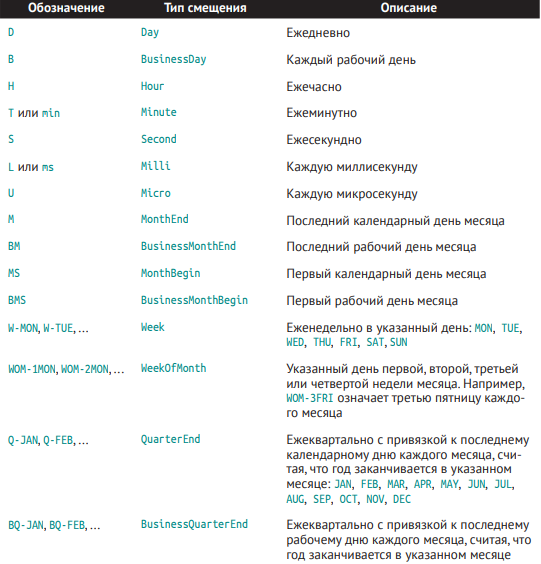
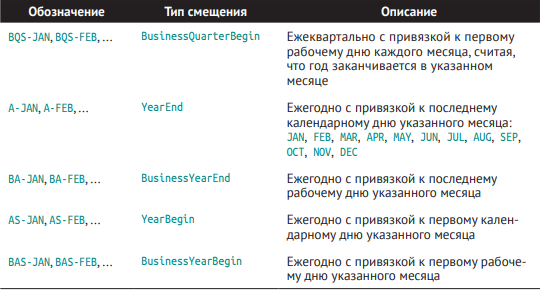

По умолчанию метод pandas.date_range сохраняет время (если оно было задано) начальной и конечной временной метки:

In [ ]:
pd.date_range("2012-05-02 12:56:31", periods=5)

Иногда начальная или конечная дата содержит время, но требуется сгенерировать 

нормализованный набор временных меток, в которых время совпадает 

с полуночью. Для этого задайте параметр normalize:

In [ ]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

### Частоты и смещения дат

Частота в  pandas состоит из базовой частоты и  кратности. Базовая частота 

обычно обозначается строкой, например 'M' означает раз в месяц, а 'H' – раз

в час. Для каждой базовой частоты определен объект, называемый смещением 

даты (date offset). Так, частоту «раз в час» можно представить классом Hour:

In [ ]:
from pandas.tseries.offsets import Hour, Minute

In [ ]:
hour = Hour()

In [ ]:
hour

In [ ]:
four_hours = Hour(4)

In [ ]:
four_hours

В большинстве приложений не приходится создавать такие объекты явно, 
достаточно использовать их строковые обозначения вида 'H' или '4H'. Наличие 
целого числа перед базовой частотой создает кратную частоту:

In [ ]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")   # Наличие целого числа перед базовой 
                                                             # частотой создает кратную частоту

In [ ]:
Hour(2) + Minute(30)   # Операция сложения позволяет объединить несколько смещений:

In [ ]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")   # Можно также задать частоту в виде строки '1h30min'

Некоторые частоты описывают неравноотстоящие моменты времени. 
Например, значения частот 'M' (конец календарного месяца) и  
'BM' (последний рабочий день месяца) зависят от числа дней в месяце, 
а в последнем случае также от того, заканчивается месяц рабочим или выходным днем. 
За неимением лучшего термина мы будем называть такие смещения привязанными.

Полезный класс частот – «неделя месяца», обозначается строкой, начинающейся с WOM. 
Он позволяет получить, например, третью пятницу каждого месяца.

In [ ]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")   # позволяет получить, например, 
                                                                             # третью пятницу каждого месяца

In [ ]:
list(monthly_dates)

In [ ]:
# возможно полезно проверить: была ли дата 2012-08-17 действительно пятницей
value = '2012-08-17'
date = datetime.strptime(value, "%Y-%m-%d")
date.strftime('%A')

### Сдвиг данных (с опережением и с запаздыванием)

Под «сдвигом» понимается перемещение данных назад и вперед по временной оси. 

У  объектов Series и  DataFrame имеется метод shift для «наивного» 

сдвига в обе стороны без модификации индекса:

In [ ]:
 ts = pd.Series(np.random.standard_normal(4),
                index=pd.date_range("2000-01-01", periods=4, freq="M"))

In [ ]:
ts

In [ ]:
ts.shift(2)    # сдвиг данных вперёд на 2 периода

In [ ]:
ts.shift(-2)    # сдвиг данных назад на 2 периода

При таком сдвиге отсутствующие данные вставляются в начало или в конец временного ряда.

Типичное применение shift – вычисление относительных изменений временного ряда или нескольких 

временных рядов и  представление их в  виде 

столбцов объекта DataFrame. Это выражается следующим образом:

In [ ]:
ts.shift(2, freq="M")

In [ ]:
ts.shift(3, freq="D")

In [ ]:
ts.shift(1, freq="90T")

Здесь T обозначает минуты. Отметим, что параметр freq задает смещение, 

применяемое к временным меткам, но истинная частота данных (если таковая 

присутствует) при этом не изменяется.

### Сдвиг дат с помощью смещений

Смещения дат можно также использовать совместно с  объектами datetime и Timestamp:

In [ ]:
from pandas.tseries.offsets import Day, MonthEnd

In [ ]:
now = datetime(2011, 11, 17)

In [ ]:
now + 3 * Day()

В случае привязанного смещения, например MonthEnd, первое сложение с ним 
продвинет дату до следующей даты с соответствующей привязкой:

In [ ]:
now + MonthEnd()

In [ ]:
now + MonthEnd(2)

Привязанные смещения можно использовать и для явного сдвига даты вперед и назад 

с помощью методов rollforward и rollback соответственно:

In [ ]:
offset = MonthEnd()

In [ ]:
offset.rollforward(now)

In [ ]:
offset.rollback(now)

У смещений дат есть интересное применение совместно с функцией groupby:

In [ ]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D")
              )

In [ ]:
ts

In [ ]:
ts.groupby(MonthEnd().rollforward).mean()

Разумеется, то же самое можно проделать проще и быстрее с помощью метода resample

In [ ]:
 ts.resample("M").mean()

### Домашнее задание

### Задача 1: Создайте индекс по датам, содержащий последний рабочий день каждого месяца, из временого интервала:

"2023-01-01":"2024-01-01"

### Задача 2: Создайте временной индекс, начиная с даты "2023-01-31", с периодом (periods=7) и частотой (freq="2h30min")

### Задача 3: 1.Создайте временной ряд в Pandas в виде Series из следующих данных (dates и data):

dates = [datetime(2023, 7, 3), datetime(2023, 7, 4),
         
         datetime(2023, 7, 5), datetime(2023, 7, 6),
         
         datetime(2023, 7, 7), datetime(2023, 7, 8),
         
         datetime(2023, 7, 9), datetime(2023, 7, 10)]

data = [1, 2, 1, 3, 2, 4, 1, 2]

### 2.Сделайте сдвиг данных вперёд на 3 периода

# 15 lesson

# Lesson topic: Time series. Часовые пояса

##### Всеми́рное координи́рованное вре́мя (англ. Coordinated Universal Time, фр. Temps Universel Coordonné; UTC) — стандарт, 

##### по которому общество регулирует часы и время. 

Отличается на целое количество секунд от атомного времени и на дробное количество секунд 

от всемирного времени UT1.

##### UTC было введено в 1972 году Международным бюро мер и весов (BIPM) в результате необходимости создания 

##### единого стандарта времени для международных коммуникаций и навигации.

UTC является основой для определения часовых поясов и времени в различных регионах мира. 

Большинство стран используют UTC в качестве стандарта для своих национальных часовых поясов.

Между UTC (Всемирным координированным временем) и UT1 (Всемирное время) разница не превышает 0,9 с, 

если не требуется высокая точность, может использоваться более общее понятие — всемирное время (UT). 

В повседневной жизни, когда дробная часть секунд не важна, среднее время по Гринвичу (GMT) может рассматриваться 

как эквивалент UTC или UT1. В противном случае, когда разница между UTC и UT1 существенна, использования термина среднее время по 

Гринвичу (GMT) избегают.

##### Западноевропейское время / среднее время по Гринвичу (Лондон, UTC + 0).

##### Московское время (Москва, UTC + 3).

Всемирное время UT является современной версией среднего времени по Гринвичу, то есть среднего солнечного времени на 

Гринвичском меридиане. Из-за неравномерности вращения Земли Гринвичский меридиан вращается также неравномерно. 

Кроме того, в результате непрерывного перемещения оси вращения в теле самой Земли географические полюса смещаются 

по поверхности Земли, а вместе с ними изменяют своё положение и плоскости истинных меридианов. 

Из-за этих факторов различают следующие системы измерения времени:

##### Работа с  часовыми поясами традиционно считается одной из самых неприятных сторон манипулирования временными рядами. 

Поэтому многие пользователи предпочитают иметь дело с временными рядами в координированном 

универсальном времени (UTC), не зависящем от географического местоположения международном стандарте. 

Часовые пояса выражаются в виде смещений от UTC; например, в Нью-Йорке время отстает от UTC 

на 4 часа в летний период и на 5 часов в остальное время года.

##### В Python информация о часовых поясах берется из сторонней библиотеки pytz (ее можно установить с помощью pip или conda), 

которая является оберткой вокруг базы данных Олсона, где собраны все сведения о мировых часовых поясах. 

Это особенно важно для исторических данных, потому что даты перехода на летнее время (и даже смещения от UTC) 

многократно менялись по прихоти местных правительств. 

В США даты перехода на летнее время с 1900 года менялись много раз!

Подробные сведения о библиотеке pytz можно найти в документации к ней. 

Но  поскольку pandas инкапсулирует функциональность pytz, то можете спокойно игнорировать весь ее API, 

кроме названий часовых поясов. Поскольку pandas в любом случае зависит от библиотеки pytz, устанавливать 

ее отдельно необязательно. А названия поясов можно узнать как интерактивно, так и из документации:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pytz

In [ ]:
timezones = pytz.all_timezones
print(timezones)  # Получить список всех часовых поясов от pytz 

In [ ]:
tz1 = pytz.timezone('Europe/Moscow')  # Получить объект часового пояса, в котором находимся мы с Вами

In [ ]:
tz1

##### LMT (local mean time) - местное среднее время. 

Если простыми словами, то это время формировалось для некоторого мередиана 
на основании солнечного времени и солнечных часов. Если заглянуть в вики, 
то можно прочесть, что этот тип учета времени использовался до введения часовых поясов.

In [ ]:
tz2 = pytz.timezone('Europe/London')  # Получить объект часового пояса для Лондона

In [ ]:
tz2

In [ ]:
tz3 = pytz.timezone('Europe/Berlin')  # Получить объект часового пояса для Берлина

In [ ]:
tz3

#### Локализация и преобразование

По умолчанию временные ряды в pandas не учитывают часовые пояса. Рассмотрим следующий ряд:

In [ ]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

In [ ]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [ ]:
ts

In [ ]:
print(ts.index.tz)  # Поле tz в индексе равно None

Но при генерировании диапазонов дат можно и указать часовой пояс:

In [ ]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")    # Но при генерировании диапазонов дат 
                                                           # можно и указать часовой пояс

In [ ]:
ts

In [ ]:
ts_utc = ts.tz_localize("UTC")    # Для преобразования даты из инвариантного формата в  локализованный 
                                  # (т. е. интерпретации в конкретном часовом поясе) служит метод tz_localize:

In [ ]:
ts_utc

In [ ]:
ts_utc.index

In [ ]:
ts_utc.tz_convert("America/New_York")   # После локализации временного ряда для его преобразования 
                                        # в другой часовой пояс нужно вызвать метод tz_conve

Приведенный выше временной ряд охватывает дату перехода на летнее 
время в часовом поясе America/New_York, мы могли бы локализовать его для 
часового пояса восточного побережья США, а затем преобразовать, скажем, в UTC 
или в берлинское время:

In [ ]:
ts_eastern = ts.tz_localize("America/New_York")

In [ ]:
ts_eastern.tz_convert("UTC")

In [ ]:
ts_eastern.tz_convert("Europe/Berlin")

In [ ]:
ts_eastern.tz_convert("Europe/Moscow")

tz_localize и tz_convert являются также методами экземпляра DatetimeIndex: 

In [ ]:
 ts.index.tz_localize("Asia/Shanghai")

### Операции над объектами Timestamp с учетом часового пояса

По аналогии с временными рядами и диапазонами дат можно локализовать

и отдельные объекты Timestamp, включив в них информацию о часовом поясе, 

а затем преобразовывать из одного пояса в другой:

In [ ]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [ ]:
stamp_utc = stamp.tz_localize("utc")

In [ ]:
stamp_utc.tz_convert("America/New_York")

In [ ]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")  # Часовой пояс можно задать и при создании 
                                                                     # объекта Timestamp:

In [ ]:
stamp_moscow

В объектах Timestamp, учитывающих часовой пояс, хранится временной штамп 

UTC в виде числа секунд от «эпохи» UNIX (1 января 1970); это значение инвариантно 

относительно преобразования из одного пояса в другой

In [ ]:
stamp_utc.value

In [ ]:
stamp_utc.tz_convert("Europe/Moscow").value

При выполнении арифметических операций над объектами pandas DateOffset

всюду, где возможно, учитывается переход на летнее время. Ниже мы конструируем временные метки, 

соответствующие моментам, которые предшествуют переходу на летнее время и возврату в обычный режим. 

Сначала за 30 минут до перехода:

In [ ]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")

In [ ]:
stamp

In [ ]:
stamp + Hour()

Затем за 90 минут до перехода с летнего времени на обычное:

In [ ]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")

In [ ]:
stamp

In [ ]:
stamp + 2 * Hour()

### Операции над датами из разных часовых поясов

Если комбинируются два временных ряда с  разными часовыми поясами, то 

в результате получится UTC. Поскольку во внутреннем представлении временные метки хранятся в UTC, 

то операция не требует никаких преобразований:

In [ ]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

In [ ]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [ ]:
ts

In [ ]:
ts1 = ts[:7].tz_localize("Europe/London")

In [ ]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

In [ ]:
result = ts1 + ts2

In [ ]:
result.index

Операции между объектами, учитывающими и не учитывающими часовой 

пояс, не поддерживаются и приводят к исключению.

### Домашнее задание

### Задача 1: Получить объект часового пояса, в котором находимся жители города Минска

### Задача 2: Сгенерируйте диапазон дат, начиная с "2023-01-01 08:00", с периодом (periods=5), указав часовой пояс 'Europe/Moscow'

### Задача 3: 1.Сгенерируйте диапазон дат, начиная с "2023-01-01", с периодом (periods=5), указав часовой пояс 'Europe/Moscow'.

### Сохраните этот диапазон в переменную dates.

### 2.Создайте переменную data, из списка 

[2, 4, 1, 5, 2]

### 3.Создайте временной ряд ts из dates и data

### 4.Преобразуйте ts в часовой пояс "America/New_York"

# 16 lesson

# Lesson topic: Time series. Периоды и арифметика периодов

##### Периоды – это промежутки времени: дни, месяцы, кварталы, годы. 

Этот тип данных представлен классом pandas.Period, конструктор которого принимает 

строку или число и поддерживаемую частоту из таблицы (Базовые частоты временных рядов, смотрите эту таблицу выше):

In [ ]:
p = pd.Period("2011", freq="A-DEC")   # здесь  - Ежегодно с привязкой 
                                      # к последнему календарному дню указанного месяца: 

In [ ]:
p

В данном случае объект Period представляет промежуток времени от 1 января 

2011 до 31 декабря 2011 включительно. Сложение и вычитание периода и целого  

числа дают тот же результат, что сдвиг на величину, кратную частоте периода:

In [ ]:
p + 5

In [ ]:
p - 2

Если у  двух периодов одинаковая частота, то их разностью является 

количество единиц между ними, выраженное в виде смещения даты:

In [ ]:
pd.Period("2014", freq="A-DEC") - p

Регулярные диапазоны периодов строятся с помощью функции period_range:

In [ ]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")

In [ ]:
periods

In [ ]:
pd.Series(np.random.standard_normal(6), index=periods)

Если имеется массив строк, то можно также использовать класс PeriodIndex, 

значениями которого являются периоды:

In [ ]:
values = ["2001Q3", "2002Q2", "2003Q1"]
# В pandas «2001Q3» означает третий квартал 2001 года, включая август, сентябрь и октябрь.
# В pandas выражение «2002Q2» означает второй квартал 2002 года

In [ ]:
index = pd.PeriodIndex(values, freq="Q-DEC")
# В pandas freq="Q-DEC" означает, что квартал заканчивается в декабре.

In [ ]:
index

### Преобразование частоты периода

Периоды и  объекты PeriodIndex можно преобразовать с  изменением частоты, 
воспользовавшись методом asfreq. Для примера предположим, что имеется годовой период, 
который мы хотим преобразовать в месячный, начинающийся 
или заканчивающийся на границе года. Это довольно просто:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
p = pd.Period("2011", freq="A-DEC")

In [ ]:
p

In [ ]:
 p.asfreq("M", how="start")

In [ ]:
p.asfreq("M", how="end")

In [ ]:
p.asfreq("M")

Можно рассматривать Period("2011", "A-DEC") как курсор, указывающий на промежуток времени, 
поделенный на периоды продолжительностью один месяц. 
Это проиллюстрировано на рисунке (смотрите в ячейке ниже). Для финансового года, заканчивающегося в любом месяце, 
кроме декабря, месячные подпериоды вычисляются по-другому

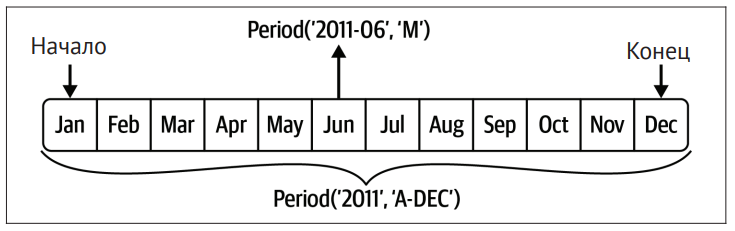

In [ ]:
p = pd.Period("2011", freq="A-JUN")

In [ ]:
p

In [ ]:
p.asfreq("M", how="start")

In [ ]:
p.asfreq("M", how="end")

Когда производится преобразование из большей частоты в меньшую, 
объемлющий период определяется в зависимости от того, куда попадает подпериод. 
Например, если частота равна A-JUN, то месяц Aug-2011 фактически является 
частью периода 2012:

In [ ]:
p = pd.Period("Aug-2011", "M")

In [ ]:
p.asfreq("A-JUN")

Эта семантика сохраняется и  в случае преобразования целых объектов 
PeriodIndex или временных рядов:

In [ ]:
periods = pd.period_range("2006", "2009", freq="A-DEC")

In [ ]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)

In [ ]:
ts

In [ ]:
ts.asfreq("M", how="start")

Здесь каждый годичный период заменен месячным, соответствующим первому попадающему в него месяцу. 
Если бы мы вместо этого захотели получить 
последний рабочий день каждого года, то должны были бы задать частоту 'B'
и указать, что нам нужен конец периода:

In [ ]:
ts.asfreq("B", how="end")

### Квартальная частота периода

Квартальные данные стандартно применяются в бухгалтерии, финансах и других 
областях. Обычно квартальные итоги подводятся относительно конца финансового года, 
каковым считается последний календарный или рабочий день одного из 
12 месяцев. Следовательно, период 2012Q4 интерпретируется по-разному в зависимости от того, 
что понимать под концом финансового года. Библиотека pandas 
поддерживает все 12 возможных значений квартальной частоты от Q-JAN до Q-DEC:

In [ ]:
p = pd.Period("2012Q4", freq="Q-JAN")

In [ ]:
p

Если финансовый год заканчивается в январе, то период 2012Q4 охватывает 
месяцы с ноября 2011 по январь 2012 года, и это легко проверить, преобразовав квартальную частоту в суточную.

In [ ]:
p.asfreq("D", how="start")

In [ ]:
p.asfreq("D", how="end")

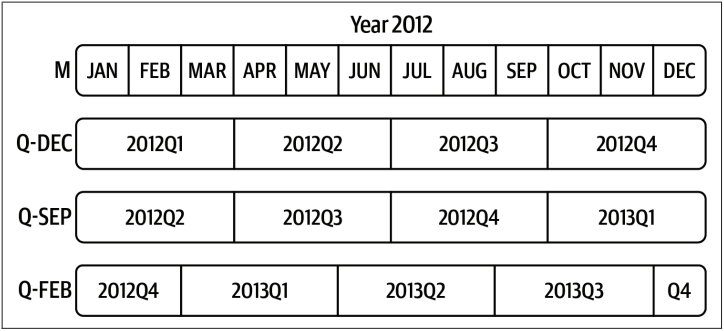

Таким образом, арифметические операции с периодами выполняются очень 
просто; например, чтобы получить временную метку для момента 
«4 часа пополудни предпоследнего рабочего дня квартала», можно было бы написать:

In [ ]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

In [ ]:
p4pm

In [ ]:
p4pm.to_timestamp()

Метод to_timestamp по умолчанию возвращает объект Timestamp, соответствующий началу периода.
Для генерирования квартальных диапазонов применяется функция pandas.
period_range. Арифметические операции такие же:

In [ ]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [ ]:
ts = pd.Series(np.arange(len(periods)), index=periods)

In [ ]:
ts

In [ ]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16

In [ ]:
ts.index = new_periods.to_timestamp()

In [ ]:
ts

### Преобразование временных меток в периоды и обратно

Объекты Series и DataFrame, индексированные временными метками, можно 
преобразовать в периоды методом to_period:

In [ ]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

In [ ]:
ts = pd.Series(np.random.standard_normal(3), index=dates)

In [ ]:
ts

In [ ]:
pts = ts.to_period()

In [ ]:
pts

Поскольку периоды всегда ссылаются на непересекающиеся временные 
промежутки, то временная метка может принадлежать только одному периоду 
данной частоты. Частота нового объекта PeriodIndex по умолчанию выводится 
из временных меток, но можно задать любую поддерживаемую частоту 
(большинство частот в табл. 11.4 поддерживаются). 
Наличие повторяющихся периодов в результате также не приводит ни к каким проблемам

In [ ]:
dates = pd.date_range("2000-01-29", periods=6)

In [ ]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)

In [ ]:
ts2

In [ ]:
ts2.to_period("M")

Для обратного преобразования во временные метки служит метод to_timestamp, 
который возвращает объект типа DatetimeIndex:

In [ ]:
pts = ts2.to_period()

In [ ]:
pts

In [ ]:
pts.to_timestamp(how="end")

### Создание PeriodIndex из массивов

В наборах данных с фиксированной частотой информация о промежутках времени 
иногда хранится в нескольких столбцах. Например, в следующем макроэкономическом 
наборе данных год и квартал находятся в разных столбцах:

In [ ]:
data = pd.read_csv("data/macrodata.csv")

In [ ]:
data.head(5)

In [ ]:
data["year"]

In [ ]:
data["quarter"]

Передав эти массивы конструктору PeriodIndex вместе с частотой, мы сможем 
объединить их для построения индекса DataFrame:

In [ ]:
 index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")

In [ ]:
index

In [ ]:
data.index = index

In [ ]:
data["infl"]

### Домашнее задание

### Задача 1: Создайте период ежегодный: для 2023 года, с привязкой к последнему календарному дню декабря месяца

### Задача 2: Преобразуйте из большей частоты в меньшую. Частота "Apr-2023" в месяц "A-JUN"

### Задача 3: У Вас имеется объект c временными метками

dates = pd.date_range("2023-01-01", periods=3, freq="M")

а также 

data = [1, 3, 2]

### 1. Создайте Series из него - объект ts

### 2. Преобразуйте этот объект ts в периоды методом to_period 

# 17 lesson

# Lesson topic: Time series. Передискретизация и преобразование частоты

Под передискретизацией понимается процесс изменения частоты временного ряда. 

##### Агрегирование с переходом от высокой частоты к низкой называется понижающей передискретизацией, 

##### а переход от низкой частоты к более высокой – повышающей передискретизацией. 

Не  всякая передискретизация попадает в одну из этих категорий; например, 

преобразование частоты W-WED (еженедельно по средам) в W-FRI не повышает и не понижает частоту.

Все объекты pandas имеют метод resample, отвечающий за любые преобразования частоты. 

API метода resample примерно такой же, как у groupby; мы сначала вызываем resample для группировки данных, 

а затем обращаемся к функции агрегирования:

In [ ]:
dates = pd.date_range("2000-01-01", periods=100)

In [ ]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [ ]:
ts

In [ ]:
ts.resample("M").mean()

In [ ]:
ts.resample("M", kind="period").mean()

Метод resample обладает большой гибкостью и  применим к  большим временным рядам. 
Примеры в следующих разделах иллюстрируют его семантику 
и использование, а в таблице ниже перечислены некоторые его аргументы.

##### Аргументы метода resample

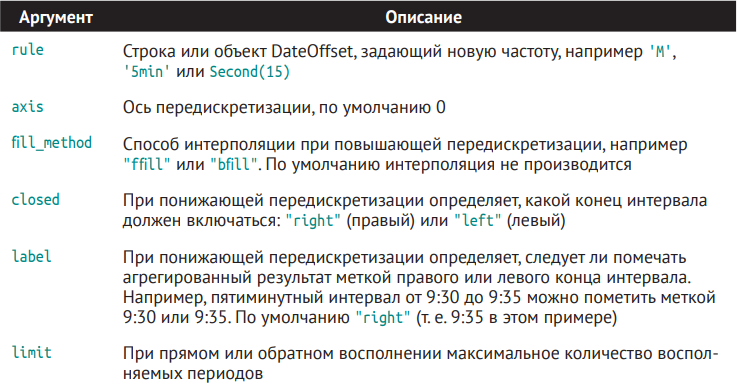
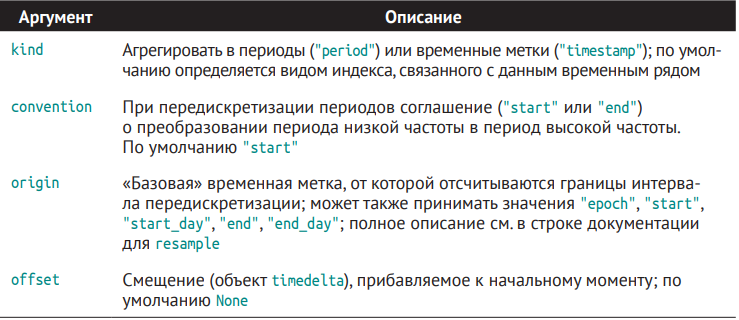

### Понижающая передискретизация

##### Понижающей передискретизацией называется агрегирование данных с целью понижения и  регуляризации частоты. 

Агрегируемые данные необязательно исправлять часто; желаемая частота определяет границы интервалов, 

разбивающих агрегируемые данные на порции. 

Например, для преобразования к месячному периоду, "M" или "BM", данные нужно разбить на интервалы продолжительностью один месяц. 

Говорят, что каждый интервал полуоткрыт; любая точка может принадлежать только одному интервалу, 

а их объединение должно покрывать всю протяженность временного ряда. 

Перед тем как выполнять понижающую передискретизацию данных методом resample, нужно решить для себя следующие вопросы:

##### • какой конец интервала будет включаться;

##### • помечать ли агрегированный интервал меткой его начала или конца.

Для иллюстрации рассмотрим данные с частотой одна минута:

In [ ]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")

In [ ]:
ts = pd.Series(np.arange(len(dates)), index=dates)

In [ ]:
ts

Пусть требуется агрегировать данные в пятиминутные группы, или столбики, вычислив сумму по каждой группе

In [ ]:
ts.resample("5min").sum()

Переданная частота определяет границы интервалов с пятиминутным приращением. 
Для этой частоты левый конец интервала по умолчанию включается, 
т. е. значение 00:00 включается в интервал от 00:00 до 00:05, а значение 00:05
исключается. Если задать параметр closed='right', то будет включаться правый 
конец интервала:

In [ ]:
ts.resample("5min", closed="right").sum()

Результирующий временной ряд помечен временными метками, соответствующими левым концам интервалов. 
Параметр label='right' позволяет использовать для этой цели метки правых концов:

In [ ]:
ts.resample("5min", closed="right", label="right").sum()

### Передискретизация OHLC

##### График OHLC (для обозначения открытия, максимума, минимума и закрытия) - 
##### это стиль финансового графика, описывающий значения открытия, максимума, минимума и закрытия 
##### для заданной координаты x (наиболее вероятное время).

В финансовых приложениях очень часто временной ряд агрегируют, 

вычисляя четыре значения для каждого интервала: 

##### первое (открытие – open), 

##### последнее (закрытие – close), 

##### максимальное (high) и 

##### минимальное (low). 

Задав параметр how='ohlc', мы получим объект DataFrame, в столбцах которого находятся эти четыре агрегата, 

которые эффективно вычисляются одним вызовом функции:

In [ ]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [ ]:
ts.resample("5min").ohlc()

На рисунке внизу показано, как данные с минутной частотой агрегируются в 5-минутные группы:

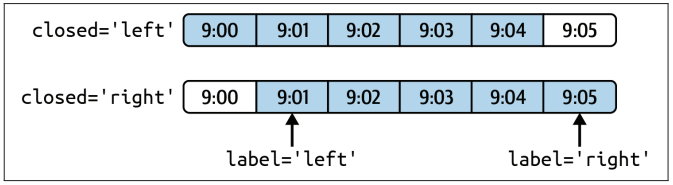

### Повышающая передискретизация и интерполяция

##### Повышающая передискретизация – это преобразование от низкой частоты к  более высокой, агрегирование при этом не  требуется. 

Рассмотрим объект DataFrame, содержащий недельные данные:

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

In [ ]:
frame

Если мы используем с этими данными функцию агрегирования, то на каждую группу получается только одно значение, 

а отсутствующие значения приводят к лакунам (пропускам). 

Чтобы перейти к более высокой частоте без агрегирования, применяется метод asfreq:

In [ ]:
df_daily = frame.resample("D").asfreq()

In [ ]:
df_daily

Допустим, мы хотим восполнить значения для дней, отличных от среды. 

Для этого применимы те же способы восполнения или интерполяции, что в методах fillna и reindex:

In [ ]:
frame.resample("D").ffill()

Можно восполнить отсутствующие значения не во всех последующих периодах, а только в заданном числе

In [ ]:
frame.resample("D").ffill(limit=2)

Важно отметить, что новый индекс дат может не совпадать со старым:

In [ ]:
frame.resample("W-THU").ffill
# В pandas «W-THU» означает еженедельную частоту (четверг)

### Передискретизация периодов

Передискретизация данных, индексированных периодами, похожа на индексирование временными метками:

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

In [ ]:
frame.head()

In [ ]:
annual_frame = frame.resample("A-DEC").mean()

In [ ]:
annual_frame

Повышающая передискретизация чуть сложнее, потому что необходимо принять решение о том, 

в какой конец промежутка времени для новой частоты помещать значения до передискретизации, 

как в случае метода asfreq. 

Аргумент convention по умолчанию равен "start", но можно задать и значение "end":

In [ ]:
# Q-DEC: поквартально, год заканчивается в декабре
annual_frame.resample("Q-DEC").ffill()

In [ ]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

Поскольку периоды ссылаются на промежутки времени, правила повышающей и понижающей передискретизаций более строгие:

• в случае понижающей передискретизации конечная частота должна 
быть подпериодом начальной;

•  в случае повышающей передискретизации конечная частота должна 
быть надпериодом начальной.

Если эти правила не выполнены, то будет возбуждено исключение. 

### Групповая передискретизация по времени

Для временных рядов метод resample семантически является групповой операцией, основанной на разбиении времени на интервалы. 
Рассмотрим пример таблицы:

In [ ]:
N = 15

In [ ]:
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

In [ ]:
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})

In [ ]:
df

Здесь мы можем индексировать по столбцу "time", а затем выполнить передискретизацию:

In [ ]:
df.set_index("time").resample("5min").count()

Предположим, что объект DataFrame включает несколько временных рядов, которые различаются по дополнительному столбцу, 
содержащему групповой ключ:

In [ ]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})

In [ ]:
df2.head(7)

Чтобы выполнить одну и ту же передискретизацию для каждого значения "key", введем объект pandas.Grouper:

In [ ]:
time_key = pd.Grouper(freq="5min")

Затем можно задать индекс по времени, сгруппировать по "key" и  time_key и агрегировать:

In [ ]:
resampled = (df2.set_index("time").groupby(["key", time_key]).sum())

In [ ]:
resampled

In [ ]:
resampled.reset_index()

У pandas.Grouper есть ограничение – индекс Series или DataFrame должен быть построен по времени.

### Домашнее задание

### Задача 1: Создайте временной ряд в Pandas в виде Series из следующих данных (dates и data):

dates = pd.date_range("2023-03-01", periods=8, freq="T")

data = [3,4,7,4,5,9,2,5,3,6,7,4,5,7,5,4,3,2]

### 2.Агрегируйте данные в 10-минутные группы, или столбики, вычислив среднее (mean) по каждой группе

### Задача 2: 1.В Вашем распоряжении есть объект DataFrame, содержащий 3-недельные данные

frame = pd.DataFrame(np.random.standard_normal((4, 4)),
                     index=pd.date_range("2023-07-03", periods=4,
                                         freq="W-TUE"),
                     columns=["One", "Two", "Three", "Foure
### 2.Перейдите к более высокой частоте ("D") с заполнением пропусков, используя метод ffill()

### Задача 3: 1.Создайте временной ряд ts в Pandas в виде Series из следующих данных (dates и data):

dates = pd.date_range("2023-03-01", periods=18, freq="T")

data = [3,4,7,4,5,9,2,5,3,6,7,4,5,7,5,4,3,2]

### 2.Используя метод np.random.permutation(data), распределите данные во временном ряду ts

### 3.Проведите передискретизацию OHLC в объекте ts, используя метод ohlc()

# 18 lesson

# Lesson topic: Time series. Скользящие оконные функции

Важный класс преобразований массива, применяемый для операций с  временными рядами, – статистические и иные функции, 

вычисляемые в скользящем окне или с экспоненциально убывающими весами. 

##### Часто их называют скользящими оконными функциями, 

хотя сюда относятся также функции, не  связанные с  окном постоянной ширины, 

##### например экспоненциально взвешенное скользящее среднее. 

Как и во всех статистических функциях, отсутствующие значения автоматически отбрасываются.

Для начала загрузим временной ряд и передискретизируем его на частоту «рабочий день»:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
close_px_all = pd.read_csv("data\\stock_px.csv",
                           parse_dates=True, index_col=0)

In [ ]:
 close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [ ]:
close_px = close_px.resample("B").ffill()

Теперь введём в  рассмотрение оператор rolling, который ведет себя как resample и groupby. 

Его можно применить к объекту Series или DataFrame, передав 

##### аргумент window (равный количеству периодов); 

созданный график показан на рисунке ниже):

In [ ]:
#%matplotlib inline      # %matplotlib inline в Jupyter Notebook — это магическая команда, 
                        # которая позволяет отображать графики Matplotlib прямо внутри ячеек ноутбука, 
                        # а не открывать их в отдельном окне. 
                        # С её помощью графики отображаются непосредственно под ячейкой кода и сохраняются в документе ноутбука.
close_px["AAPL"].plot()

In [ ]:
close_px["AAPL"].rolling(250).mean().plot()    # Скользящее среднее котировок акций Apple за 250 дней

Выражение rolling(250) ведет себя как groupby, но вместо группировки создает объект, 

который допускает группировку по скользящему окну шириной 

250 дней. Таким образом, здесь мы имеем средние котировки акций Apple в скользящем окне шириной 250 дней.

По умолчанию функции создания скользящих окон требуют, чтобы все значения в  окне были отличны от NA. 

Это поведение можно изменить, чтобы учесть возможность отсутствия данных и, в частности, тот факт, 

что в начале временного ряда количество периодов данных меньше window (см. рис.):

In [ ]:
plt.figure()

In [ ]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

In [ ]:
std250[5:12]

In [ ]:
std250.plot()

Чтобы вычислить среднее с  расширяющимся окном, используйте оператор 

expanding вместо rolling. В этом случае начальное окно расположено в начале 

временного ряда и увеличивается в размере, пока не охватит весь ряд. 

Среднее с расширяющимся окном для временного ряда std250 вычисляется следующим образом:

In [ ]:
expanding_mean = std250.expanding().mean()

При вызове функции скользящего окна от имени объекта DataFrame преобразование 

применяется к каждому столбцу (см. рис.)

In [ ]:
#plt.style.use('grayscale') # цвет - 'grayscale'. Так мы задаём стиль из matplotlib
plt.style.use('seaborn-v0_8-bright') # задаём другой стиль из matplotlib

In [ ]:
plt.style.available # так можно посмотреть все доступные стили в matplotlib

In [ ]:
close_px.rolling(60).mean().plot(logy=True)  # Скользящее среднее котировок акций за 60 дней (по оси y отложен логарифм)

Функция rolling принимает также строку, содержащую фиксированное 

временное смещение, а не количество периодов. Такой вариант может быть 

полезен для нерегулярных временных рядов. Точно такие же строки передаются resample. 

Например, вот как можно было бы вычислить скользящее среднее за 20 дней:

In [ ]:
close_px.rolling("20D").mean()

### Экспоненциально взвешенные функции

Вместо использования окна постоянного размера, когда веса всех наблюдений одинаковы, 
можно задать постоянный коэффициент затухания, чтобы 
повысить вес последних наблюдений. Есть два способа задать коэффициент затухания, 
самый популярный – использовать промежуток (span), потому что результаты в этом случае получаются сравнимыми с применением
простой скользящей оконной функции, для которой размер окна равен промежутку.
Поскольку экспоненциально взвешенная статистика придает больший вес 
недавним наблюдениям, она быстрее «адаптируется» к изменениям по сравнению с вариантом с равными весами.
В pandas имеется оператор ewm (exponentially weighted moving – экспоненциально взвешенный сдвиг), который работает совместно с rolling и expanding. 
В примере ниже скользящее среднее котировок акций Apple за 60 дней сравнивается с экспоненциально взвешенным (EW) скользящим средним для span=60
(рис. 11.7):


In [ ]:
aapl_px = close_px["AAPL"]["2006":"2007"]

In [ ]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [ ]:
ewma30 = aapl_px.ewm(span=30).mean()

In [ ]:
aapl_px.plot(style="b-", label="Price")           # style="b-"  - голубая сплошная линия
ma30.plot(style="g--", label="Simple Moving Avg") # style="g--" - зелёная прерывистая линия
ewma30.plot(style="r-", label="EW MA")            # "r-"        - красная сплошная линия
plt.legend()

### Домашнее задание

### Задача 1: Проделайте аналогичные действия, описанные в 18 lesson, для акций Корпорации Майкрософт ("MSFT")

### Задача 2: Проделайте аналогичные действия, описанные в 18 lesson, для акций Exxon Mobil Corporation ("XOM")

# 19 lesson

# Lesson topic: Time series. Бинарные скользящие оконные функции

Для некоторых статистических операций, в частности корреляции и ковариации, необходимы два временных ряда. 

Например, финансовых аналитиков часто интересует корреляция цены акции с  основным биржевым индексом типа S&P 500. 

Чтобы найти эту величину, мы сначала вычислим относительные изменения в процентах для всего нашего временного ряда.

##### Корреляция — это статистическая техника, которая измеряет силу взаимосвязи между двумя переменными.

Коэффициент корреляции, обозначаемый как «r», варьируется от -1 до +1. 

Значение -1 указывает на идеальную отрицательную корреляцию, 

значение 0 — на отсутствие корреляции, 

а значение +1 — на идеальную положительную корреляцию.

В Pandas для вычисления корреляции одного столбца относительно всех остальных можно использовать функцию corr(). 

По умолчанию она вычисляет коэффициент корреляции Пирсона, который является наиболее часто используемым коэффициентом корреляции.

##### Ковариация — это мера взаимосвязи между двумя случайными величинами, которая показывает, 

насколько сильно две случайные величины различаются друг от друга.

Положительная ковариация означает, что доходность активов изменяется вместе, 

в то время как отрицательная ковариация означает, что они изменяются обратно пропорционально.

В Pandas ковариацию можно найти с помощью метода DataFrame.cov(). 

Он вычисляет попарную ковариацию столбцов, исключая значения NA / null.

In [ ]:
spx_px = close_px_all["SPX"]

In [ ]:
spx_rets = spx_px.pct_change()

In [ ]:
returns = close_px.pct_change()

Если теперь вызвать rolling, а за ней функцию агрегирования corr, 

то мы сможем вычислить скользящую корреляцию с spx_rets (получающийся график показан на рисунке внизу):

In [ ]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

In [ ]:
corr.plot()

Пусть требуется вычислить корреляцию индекса S&P 500 сразу с несколькими акциями. 

Можно было бы написать цикл, в  котором она вычисляется для каждой акции, как было сделано для Apple выше, 

но если каждая акция представлена столбцом в одном объекте DataFrame, то можно вычислить все 

корреляции за один прием, вызвав от имени DataFrame метод rolling и передав ему временной ряд spx_rets.

Результат показан на рисунке внизу.

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

In [ ]:
corr.plot()

### Скользящие оконные функции, определенные пользователем

Метод apply скользящего окна rolling и других подобных объектов позволяет 
применить произвольную функцию, принимающую массив, к  скользящему 
окну. Единственное требование заключается в том, что функция должна порождать 
только одно скалярное значение (производить редукцию) для каждого фрагмента массива. 
Например, при вычислении выборочных квантилей 
с помощью rolling(...).quantile(q) нам может быть интересен процентильный 
ранг некоторого значения относительно выборки. Это можно сделать с помощью 
функции scipy.stats.percentileofscore (график показан на рис. 11.10):

In [ ]:
from scipy.stats import percentileofscore

In [ ]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

In [ ]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)

In [ ]:
result.plot()

Установить SciPy можно с помощью conda или pip:
pip install scipy

Что можно добавить к сказанному и рассмотренному материалу по библиотеке pandas?

Вопросы могут быть и обязательно будут у Вас. И это нормально.

В этом случае можно посоветовать:

● Обращаться к официальной технической документации библиотеки Numpy (http://www.pandas.org)

● Задавать вопросы на ресурсе https://stackoverflow.com/

● Гуглить и находить ответы на все интересующие вопросы.

###### На этом мы заканчиваем знакомство с основами библиотеки pandas.

### Рекомендуемая литература:

1.Уэс Маккини. Python и анализ данных. М.: МК Пресс, 2023.

2.Джоэл Грас. Data science. Наука о данных с нуля. СПб.: БХВ-Петербурr, 2021. 

3.Дж.Вандер Плас. Python для сложных задач. Наука о данных и машинное обучение. СПб.: Питер, 2018.

### Домашнее задание

### Задача 1: Проделайте аналогичные действия, описанные в 19 lesson, для акций Корпорации Майкрософт ("MSFT")

### Задача 2: Проделайте аналогичные действия, описанные в 19 lesson, для акций Exxon Mobil Corporation ("XOM")